# Importing the libraries

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

### It appears the top 5 happiest countries appear to be Western countries where Europe seems to be among top 4 and North Amrica reagion on 5th place

In [51]:
#load the dataset
df = pd.read_csv("D:/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### The top least happiest countries appear to be from Sub-Saharan Africa and Middle East and Northern Africa region

In [52]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### The dataset appears to have a total of 158 rows and 12 columns.
### Hence we have an happiness report for about 158 countries
### There are about 212 countries in the world and about 54 countries have not made it in this list

In [53]:
df.shape

(158, 12)

# Dropping the columns

## In this scenario, we are going to drop 3 columns.

### Columns "Country" and "Region" are dropped because this dataset is about ranks and it can change every year and its not permanant. Column "Happiness rank" is dropped because it's same as the column "Happiness Score" and make no sense in keeping a redundant column


In [54]:
df.drop(columns = ["Country", "Region", "Happiness Rank"], axis=1, inplace=True)

# I have considered to drop the columns Country and Region as it's not adding any value to this problem


# Preporcessing

### The dataset appears to have all the information intact and as 158 non null out of 158 rows.
### There are a total of 9 columns with float data type

In [55]:
pd.set_option("display.max_rows", None)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [57]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [58]:
df.shape

(158, 9)

In [59]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Check for null or Nan values

In [60]:
#check for missing values if any

df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

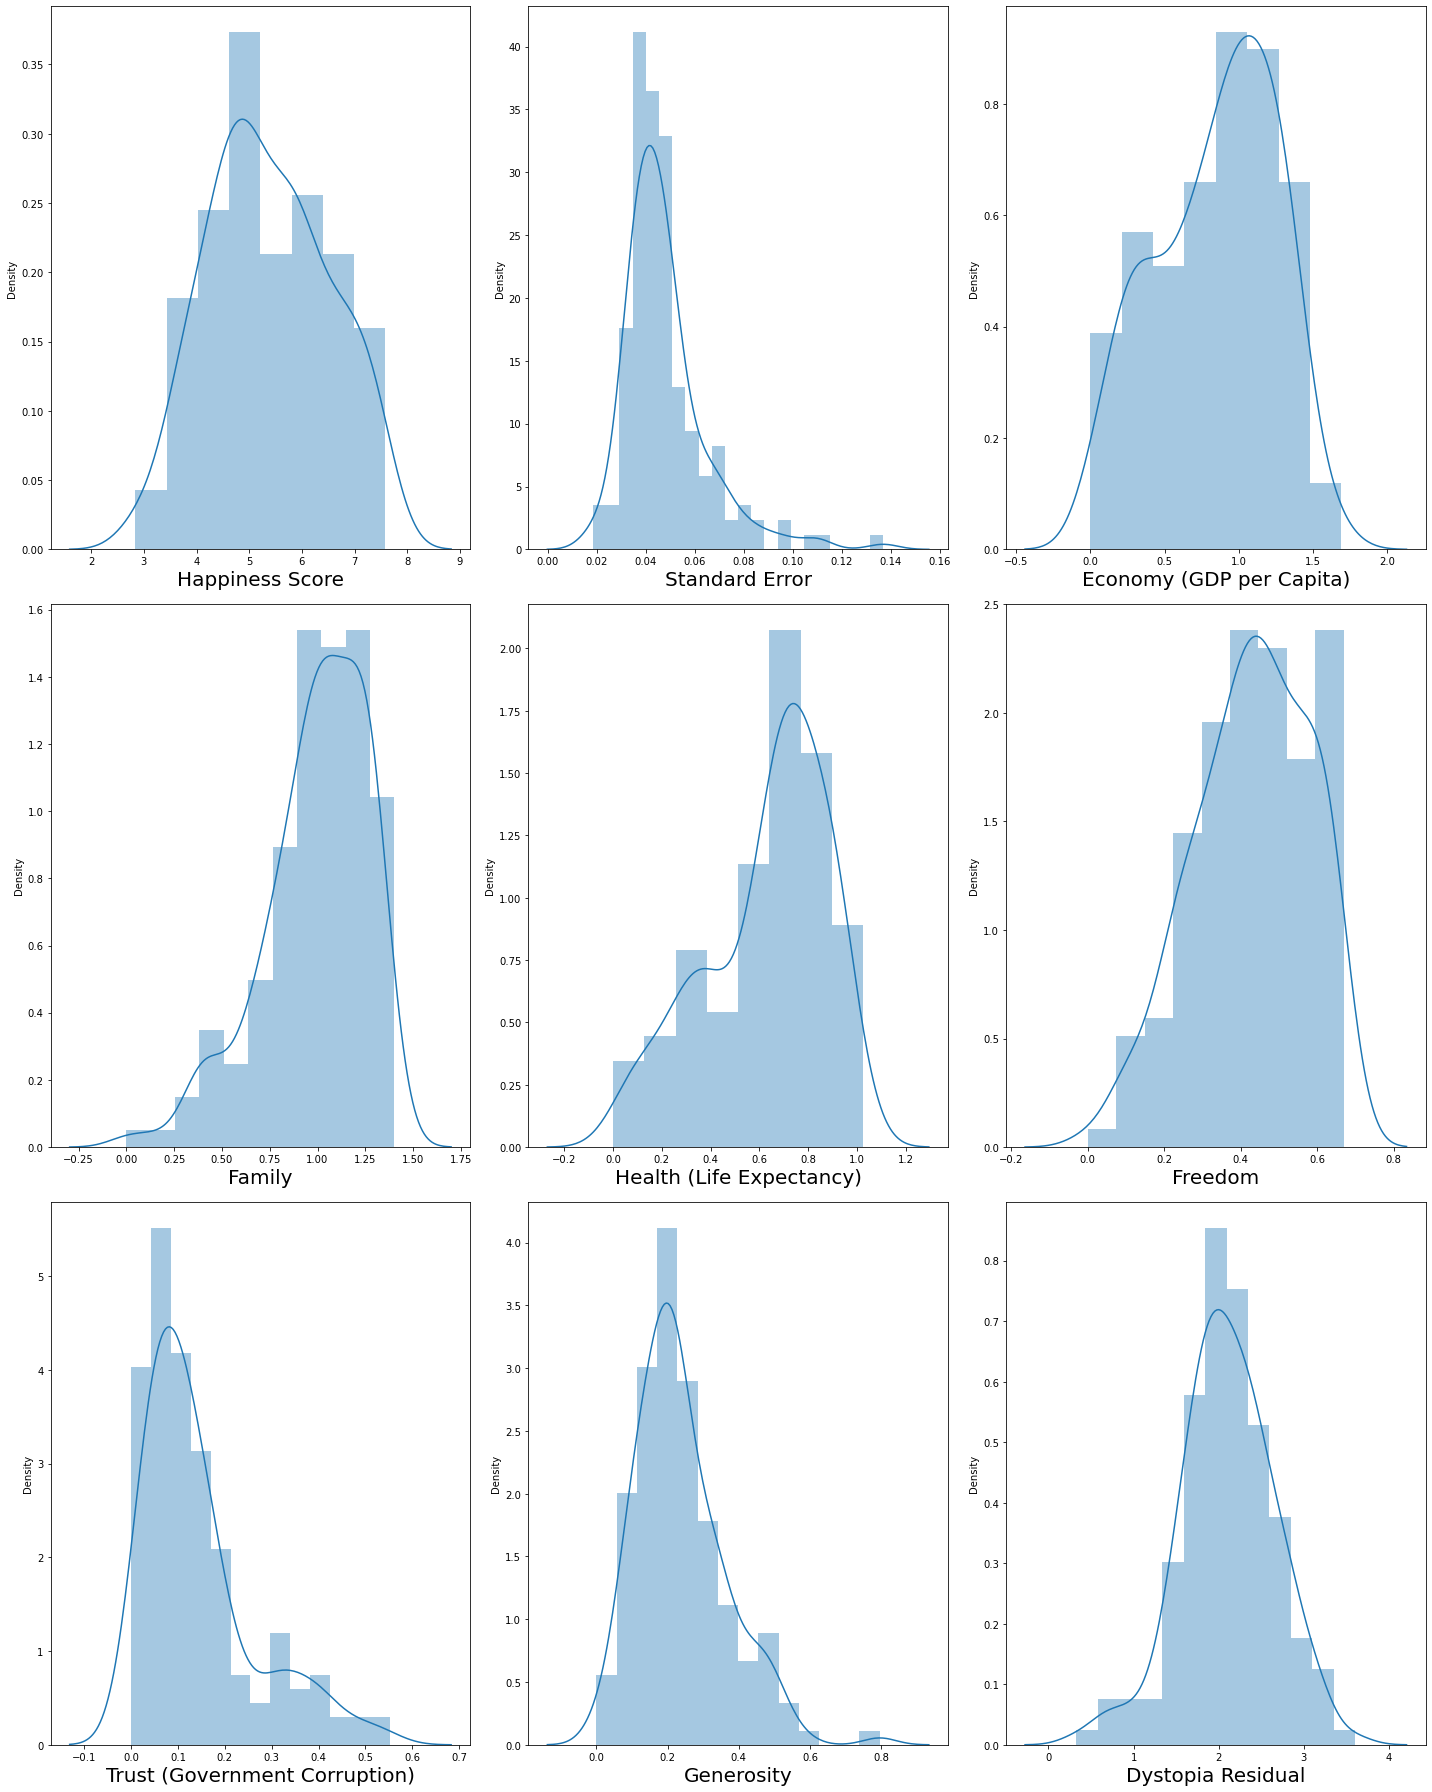

In [61]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

In [62]:
from scipy.stats import zscore

z_score = zscore(df[df.columns])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In thsi case its approximately 5.69%

In [63]:
# Percentage data loss:

loss_percent = (158-149)/158*100
print(loss_percent)

5.69620253164557


# Distribution of all the columns in the dataset (post z-score)

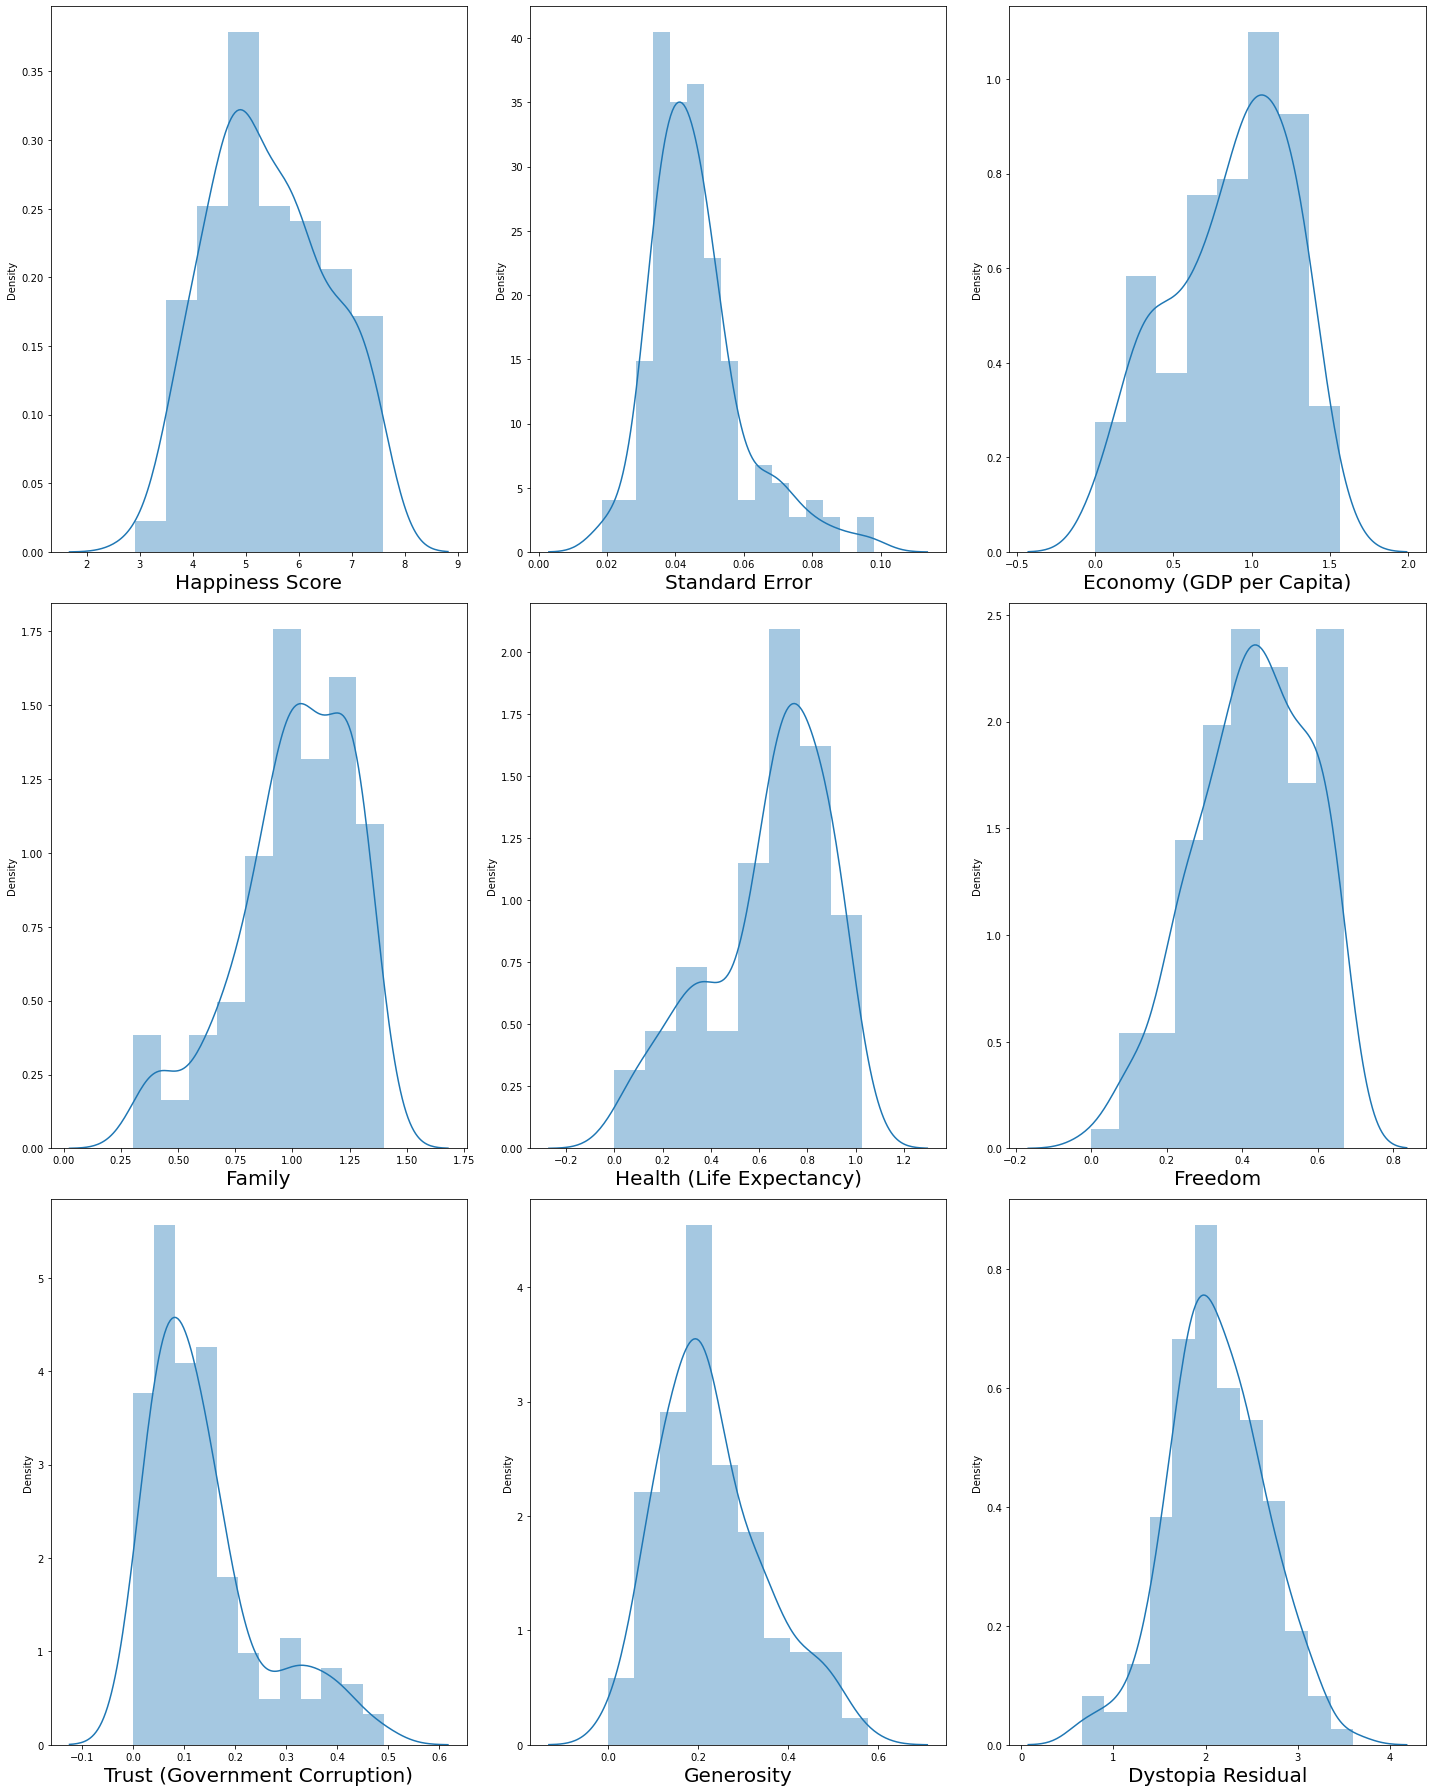

In [64]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Splitting up of dataset with x (features) and y (target column)

In [65]:

x = df.drop(columns = ["Happiness Score"], axis=1)
y = df["Happiness Score"]

### Check for skewness of data

#### The data is not skewed and it falls within the accepted range

In [66]:
x.skew()

Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

# Lets us now Scale the data for further processing.¶

#### I am using StandardScaler in this scenario 

In [67]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<IPython.core.display.Javascript object>

# Finding variance inflation factor in each scaled column¶
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears the features have no multicolinearity

In [68]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.168812,Standard Error
1,4.200848,Economy (GDP per Capita)
2,1.930975,Family
3,3.427562,Health (Life Expectancy)
4,1.861044,Freedom
5,1.470350,Trust (Government Corruption)
6,1.340286,Generosity
7,1.034747,Dystopia Residual


# split the dataset into train and test data set

In [69]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Create multi output regression models


### 1) Multiple LinearRegression

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

y_pred = lin_reg.predict(x_test)

print("Adjusted R2 squared : ",lin_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9999999425806766
Mean Absolute Error (MAE):  0.000265614807348206
Mean Squared Error (MSE):  9.718652751919679e-08
Root Mean Squared Error (RMSE):  0.0003117475381124874


### 2) DecisionTreeRegressor

In [71]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.5198000000000002
Mean Squared Error (MSE):  0.4288497555555556
Root Mean Squared Error (RMSE):  0.6548662119513845


### 3) RandomForestRegressor

In [72]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9837480322229836
Mean Absolute Error (MAE):  0.3705837777777779
Mean Squared Error (MSE):  0.22947643153111122
Root Mean Squared Error (RMSE):  0.4790369834690337


### 4) XGBRegressor

In [73]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print("Adjusted R2 squared : ",xgb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9999995890318941
Mean Absolute Error (MAE):  0.3072469129774305
Mean Squared Error (MSE):  0.1569380374960275
Root Mean Squared Error (RMSE):  0.3961540577805906


# Selecting the best ML model for this dataset

#### From the below, it appears RandomForestRegressor is the appropriate algorithm for this scenario

| Models used | Adjusted R2 score | MSE | Difference output |
| --- | --- | --- |---|
| LinearRegression | 0.9999999425807 | 0.0000000971 | 0.9999998454807|
| DecisionTreeRegressor | 100 | 0.428849756 | 99.5711502444444 |
| RandomForestRegressor | 0.983748032 | 0.229476432 | 0.7542716006919 |
| XGBRegressor | 0.999999589 | 0.156938037 | 0.8430615515359 |


# Hyper Parameter Tuning
### Let us try to tune the proposed model (RandomForestRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

In [74]:
parameters = {"criterion":["mse", "mae"],
              "max_features": ["auto", "sqrt", "log2"],
              "max_features":[100, 200],
              "max_depth": [4,5,6,7,8]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [29]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [30]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [31]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

### Rebuild the model using the appropriate params we recieved from best_params_¶

In [48]:
mod = RandomForestRegressor(criterion="mse", max_depth=8, max_features="auto", n_estimators=200)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
pred

array([5.60423849, 4.90703487, 6.4724619 , 6.4102879 , 4.64250603,
       4.45076801, 4.67191571, 5.45861277, 5.31245174, 5.50114157,
       4.92284654, 7.41324021, 6.26605854, 5.80313692, 5.12935363,
       6.06113944, 4.73122721, 5.34606098, 5.59693562, 4.37490389,
       6.76962575, 5.61243678, 5.28834644, 6.99448021, 6.0057611 ,
       6.75075361, 4.66180417, 5.28960539, 4.13406979, 6.19227991,
       5.87476914, 5.11188246, 5.04743994, 7.35717111, 4.85013563,
       5.11947741, 6.59095875, 7.29425825, 4.07513164, 4.51304827,
       4.96868281, 7.293429  , 6.72940186, 4.86325753, 4.63171964])

# Saving the model (using joblib)

In [77]:
import joblib
joblib.dump(mod,"Happiness_Dataset.pkl")

['Happiness_Dataset.pkl']

# Loading the saved model

In [78]:
model = joblib.load("Happiness_Dataset.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,5.604238
1,4.907035
2,6.472462
3,6.410288
4,4.642506
5,4.450768
6,4.671916
7,5.458613
8,5.312452
9,5.501142
